In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import nltk
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import csv
from tqdm import tqdm
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import hamming_loss
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.svm import LinearSVC
import pickle

songs = pd.read_csv("songs_topics_dataset.csv", sep = ',')
songs.head(100)

,ID,TITLE,LYRICS,God,Travel,Religion,Post-traumatic,Psychotic,Party,Nostalgia,...,Servitude,Depression,Hope,Money,Selfishness,Respect,Fear,Celebration,Happiness,Disappointment
0,165,Fever,never know much love never know much care put ...,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1149,I've Got You Under My Skin,got skin got deep heart deep heart really part...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,132,Blue Moon,blue moon saw standing alone without dream hea...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,131,Orange Colored Sky,walking along mindin business orange colored s...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,137,Good Morning,good morning good morning danced whole night g...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,136,Something Stupid,know stand line think time spend evening go pl...,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,135,Set You Free,often fool say love cause gone end lonely know...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,134,After You've Gone,gone left crying gone denying feel blue feel s...,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,139,"Hey, Good Lookin'",hey hey good lookin whatcha got cookin cookin ...,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
9,138,Show Them To Me,oh seems whole world gone crazy much hate kill...,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


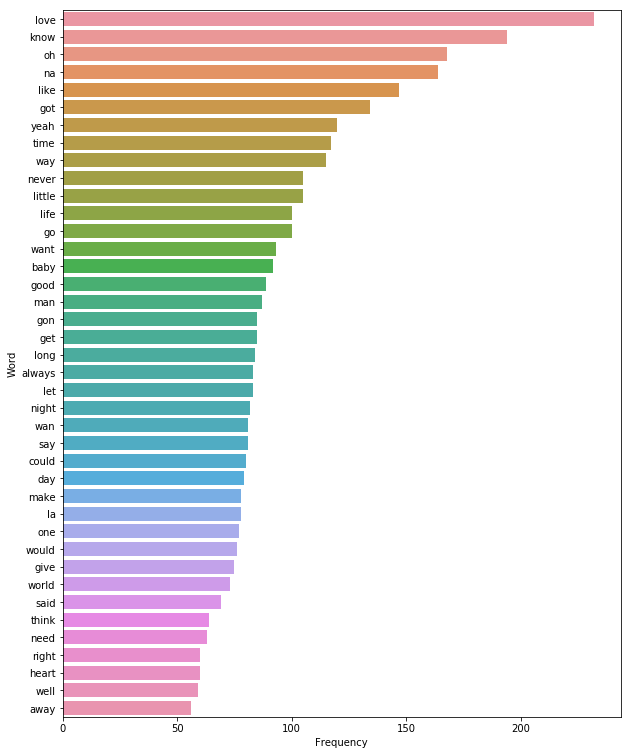

In [3]:
a = songs['LYRICS'].str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(a)
word_dist = nltk.FreqDist(words)
rslt = pd.DataFrame(word_dist.most_common(40),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,13)) 
ax = sns.barplot(data=rslt, x= "Frequency", y = "Word") 
ax.set(ylabel = 'Word') 
plt.show()

In [17]:

train, test = train_test_split(songs, random_state=4, test_size=0.10, shuffle=True)

train_text = train['LYRICS'].values.astype('U')
test_text = test['LYRICS'].values.astype('U')

vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2', max_features = 100)
vectorizer.fit(train_text)
vectorizer.fit(test_text)
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['ID', 'TITLE', 'LYRICS', 'God', 'Travel', 'Religion', 'Post-traumatic', 'Psychotic', 'Party', 'Nostalgia', 'Feminism', 'Relationship', 'Drugs', 'Personality-disorder', 'Maniac', 'Vengeance', 'Poverty', 'Adventure', 'College', 'Masculism', 'Mindset', 'Personal-Style', 'Obsessive-compulsive', 'Freedom', 'Loneliness', 'Chaos', 'Break-up', 'Sadness', 'Future', 'Nightlife', 'Narcissist', 'Capitalism', 'Friendship', 'Childhood', 'Youthful', 'Brave', 'Love', 'Riot', 'Family', 'Regreat', 'Country-Life', 'Free-Speech', 'Prostitution', 'Society', 'Servitude', 'Depression', 'Hope', 'Money', 'Selfishness', 'Respect', 'Fear', 'Celebration', 'Happiness','Disappointment'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['ID', 'TITLE', 'LYRICS', 'God', 'Travel', 'Religion', 'Post-traumatic', 'Psychotic', 'Party', 'Nostalgia', 'Feminism', 'Relationship', 'Drugs', 'Personality-disorder', 'Maniac', 'Vengeance', 'Poverty', 'Adventure', 'College', 'Masculism', 'Mindset', 'Personal-Style', 'Obsessive-compulsive', 'Freedom', 'Loneliness', 'Chaos', 'Break-up', 'Sadness', 'Future', 'Nightlife', 'Narcissist', 'Capitalism', 'Friendship', 'Childhood', 'Youthful', 'Brave', 'Love', 'Riot', 'Family', 'Regreat', 'Country-Life', 'Free-Speech', 'Prostitution', 'Society', 'Servitude', 'Depression', 'Hope', 'Money', 'Selfishness', 'Respect', 'Fear', 'Celebration', 'Happiness','Disappointment'], axis=1)



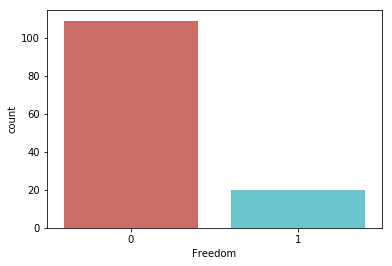

In [20]:

sns.countplot(x="Freedom", data=songs, palette = 'hls')

In [24]:
NB_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MultinomialNB(
                    fit_prior=True, class_prior=None))),
            ])

In [29]:
categories = ['God', 'Travel', 'Religion', 'Post-traumatic', 'Psychotic', 'Party', 'Nostalgia', 'Feminism', 'Relationship', 'Drugs', 'Personality-disorder', 'Maniac', 'Vengeance', 'Poverty', 'Adventure', 'College', 'Masculism', 'Mindset', 'Personal-Style', 'Obsessive-compulsive', 'Freedom', 'Loneliness', 'Chaos', 'Break-up', 'Sadness', 'Future', 'Nightlife', 'Narcissist', 'Capitalism', 'Friendship', 'Childhood', 'Youthful', 'Brave', 'Love', 'Riot', 'Family', 'Regreat', 'Country-Life', 'Free-Speech', 'Prostitution', 'Society', 'Servitude', 'Depression', 'Hope', 'Money', 'Selfishness', 'Respect', 'Fear', 'Celebration', 'Happiness','Disappointment']

X_train = train.LYRICS
X_test = test.LYRICS
print(X_train.shape)
print(X_test.shape)

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    NB_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = NB_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

(116,)
(13,)
... Processing God
Test accuracy is 0.846153846154
... Processing Travel
Test accuracy is 0.923076923077
... Processing Religion


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Post-traumatic
Test accuracy is 0.923076923077
... Processing Psychotic
Test accuracy is 1.0
... Processing Party
Test accuracy is 0.769230769231
... Processing Nostalgia
Test accuracy is 1.0
... Processing Feminism
Test accuracy is 0.923076923077
... Processing Relationship
Test accuracy is 0.846153846154
... Processing Drugs
Test accuracy is 1.0
... Processing Personality-disorder
Test accuracy is 1.0
... Processing Maniac
Test accuracy is 1.0
... Processing Vengeance
Test accuracy is 1.0
... Processing Poverty
Test accuracy is 1.0
... Processing Adventure
Test accuracy is 1.0
... Processing College
Test accuracy is 0.923076923077
... Processing Masculism
Test accuracy is 1.0
... Processing Mindset
Test accuracy is 1.0
... Processing Personal-Style


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 0.923076923077
... Processing Obsessive-compulsive
Test accuracy is 0.923076923077
... Processing Freedom
Test accuracy is 0.769230769231
... Processing Loneliness
Test accuracy is 0.923076923077
... Processing Chaos
Test accuracy is 0.923076923077
... Processing Break-up
Test accuracy is 0.846153846154
... Processing Sadness
Test accuracy is 1.0
... Processing Future
Test accuracy is 0.923076923077
... Processing Nightlife
Test accuracy is 0.846153846154
... Processing Narcissist
Test accuracy is 1.0
... Processing Capitalism


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Friendship
Test accuracy is 0.846153846154
... Processing Childhood
Test accuracy is 1.0
... Processing Youthful
Test accuracy is 1.0
... Processing Brave
Test accuracy is 1.0
... Processing Love
Test accuracy is 0.615384615385
... Processing Riot
Test accuracy is 1.0
... Processing Family
Test accuracy is 1.0
... Processing Regreat
Test accuracy is 0.923076923077
... Processing Country-Life
Test accuracy is 0.923076923077
... Processing Free-Speech
Test accuracy is 1.0
... Processing Prostitution


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Society
Test accuracy is 0.923076923077
... Processing Servitude
Test accuracy is 0.846153846154
... Processing Depression
Test accuracy is 1.0
... Processing Hope
Test accuracy is 1.0
... Processing Money
Test accuracy is 1.0
... Processing Selfishness


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Respect
Test accuracy is 0.923076923077
... Processing Fear
Test accuracy is 0.923076923077
... Processing Celebration
Test accuracy is 1.0
... Processing Happiness
Test accuracy is 0.846153846154
... Processing Disappointment
Test accuracy is 1.0


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


In [33]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing God
Test accuracy is 0.846153846154
... Processing Travel
Test accuracy is 0.923076923077
... Processing Religion


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 1.0
... Processing Post-traumatic
Test accuracy is 0.923076923077
... Processing Psychotic
Test accuracy is 1.0
... Processing Party
Test accuracy is 0.769230769231
... Processing Nostalgia
Test accuracy is 1.0
... Processing Feminism
Test accuracy is 0.923076923077
... Processing Relationship
Test accuracy is 0.846153846154
... Processing Drugs
Test accuracy is 1.0
... Processing Personality-disorder


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 1.0
... Processing Maniac
Test accuracy is 1.0
... Processing Vengeance
Test accuracy is 1.0
... Processing Poverty
Test accuracy is 1.0
... Processing Adventure
Test accuracy is 1.0
... Processing College
Test accuracy is 0.923076923077
... Processing Masculism
Test accuracy is 1.0
... Processing Mindset
Test accuracy is 1.0
... Processing Personal-Style
Test accuracy is 0.923076923077
... Processing Obsessive-compulsive
Test accuracy is 0.923076923077
... Processing Freedom


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 0.769230769231
... Processing Loneliness
Test accuracy is 0.923076923077
... Processing Chaos
Test accuracy is 0.923076923077
... Processing Break-up
Test accuracy is 0.846153846154
... Processing Sadness
Test accuracy is 1.0
... Processing Future


/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 0.923076923077
... Processing Nightlife
Test accuracy is 0.846153846154
... Processing Narcissist
Test accuracy is 1.0
... Processing Capitalism
Test accuracy is 1.0
... Processing Friendship
Test accuracy is 0.846153846154
... Processing Childhood


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Youthful
Test accuracy is 1.0
... Processing Brave
Test accuracy is 1.0
... Processing Love
Test accuracy is 0.615384615385
... Processing Riot
Test accuracy is 1.0
... Processing Family


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 1.0
... Processing Regreat
Test accuracy is 0.923076923077
... Processing Country-Life
Test accuracy is 0.923076923077
... Processing Free-Speech
Test accuracy is 1.0
... Processing Prostitution
Test accuracy is 1.0
... Processing Society


/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 0.923076923077
... Processing Servitude
Test accuracy is 0.846153846154
... Processing Depression
Test accuracy is 1.0
... Processing Hope
Test accuracy is 1.0
... Processing Money
Test accuracy is 1.0
... Processing Selfishness


/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


Test accuracy is 1.0
... Processing Respect
Test accuracy is 0.923076923077
... Processing Fear
Test accuracy is 0.923076923077
... Processing Celebration
Test accuracy is 1.0
... Processing Happiness
Test accuracy is 0.846153846154
... Processing Disappointment
Test accuracy is 1.0


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


In [40]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(LinearSVC(), n_jobs=1)),
            ])

for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SVC_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SVC_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing God
Test accuracy is 0.846153846154
... Processing Travel
Test accuracy is 0.923076923077
... Processing Religion
Test accuracy is 1.0
... Processing Post-traumatic
Test accuracy is 0.923076923077
... Processing Psychotic


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Party
Test accuracy is 0.769230769231
... Processing Nostalgia
Test accuracy is 1.0
... Processing Feminism
Test accuracy is 0.923076923077
... Processing Relationship
Test accuracy is 0.846153846154
... Processing Drugs
Test accuracy is 1.0
... Processing Personality-disorder
Test accuracy is 1.0
... Processing Maniac
Test accuracy is 1.0
... Processing Vengeance
Test accuracy is 1.0
... Processing Poverty
Test accuracy is 1.0
... Processing Adventure
Test accuracy is 1.0
... Processing College
Test accuracy is 0.923076923077
... Processing Masculism
Test accuracy is 1.0
... Processing Mindset
Test accuracy is 1.0
... Processing Personal-Style
Test accuracy is 0.923076923077
... Processing Obsessive-compulsive
Test accuracy is 0.923076923077
... Processing Freedom


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 0.769230769231
... Processing Loneliness
Test accuracy is 0.923076923077
... Processing Chaos
Test accuracy is 0.923076923077
... Processing Break-up
Test accuracy is 0.846153846154
... Processing Sadness
Test accuracy is 1.0
... Processing Future
Test accuracy is 0.923076923077
... Processing Nightlife
Test accuracy is 0.846153846154
... Processing Narcissist
Test accuracy is 1.0
... Processing Capitalism
Test accuracy is 1.0
... Processing Friendship
Test accuracy is 0.846153846154
... Processing Childhood
Test accuracy is 1.0
... Processing Youthful


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))
/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Brave
Test accuracy is 1.0
... Processing Love
Test accuracy is 0.615384615385
... Processing Riot
Test accuracy is 1.0
... Processing Family
Test accuracy is 1.0
... Processing Regreat
Test accuracy is 0.923076923077
... Processing Country-Life


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 0.923076923077
... Processing Free-Speech
Test accuracy is 1.0
... Processing Prostitution
Test accuracy is 1.0
... Processing Society
Test accuracy is 0.923076923077
... Processing Servitude
Test accuracy is 0.846153846154
... Processing Depression
Test accuracy is 1.0
... Processing Hope


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


Test accuracy is 1.0
... Processing Money
Test accuracy is 1.0
... Processing Selfishness
Test accuracy is 1.0
... Processing Respect
Test accuracy is 0.923076923077
... Processing Fear
Test accuracy is 0.923076923077
... Processing Celebration
Test accuracy is 1.0
... Processing Happiness
Test accuracy is 0.846153846154
... Processing Disappointment
Test accuracy is 1.0


/anaconda2/lib/python2.7/site-packages/sklearn/multiclass.py:76: UserWarning: Label not 0 is present in all training examples.
  str(classes[c]))


In [39]:
LogReg_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer(stop_words=stop_words)),
                ('clf', OneVsRestClassifier(MLkNN(k=1))),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    LogReg_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = LogReg_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing God


ValueError: row index 20 out of bounds